## Assigments 3.1
### Martiros Yeghiazaryan

This first part of the assignment requires to implement yourself basic cross-validation strategies.

**Exercise 1.** Define a 10-fold classification strategy to test the accuracy of a Linear Discriminant Analysis (LDA) classifier for the data created as follows:

In [41]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt


# imports
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.metrics import (
    accuracy_score,
    auc,
    precision_score,
    recall_score,
    roc_curve,
)
from sklearn.model_selection import (
    RepeatedKFold,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)

pio.templates.default = "plotly_white"

X, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, \
                           random_state=0, n_clusters_per_class=1, weights = [0.5])


In [42]:
from sklearn.utils import shuffle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


model = LinearDiscriminantAnalysis()
data_idx = np.arange(X.shape[0])

# shuffling the data indices and getting data and labels at shuffled indices
X_shuffled = X[data_idx,:]
y_shuffled = y[data_idx]
k = 10

fold_size = np.floor(X_shuffled.shape[0]/k)

print('The fold size is:', fold_size)

training_acc = []
testing_acc = []

for i in range(k):  
    begin = int(i*fold_size) 
    end = int((i+1)*fold_size)
    print(begin,end)
    testing_data = X_shuffled[begin:end,:]
    testing_labels = y_shuffled[begin:end]
    training_indices = np.setdiff1d(range(X_shuffled.shape[0]),range(begin,end), assume_unique=True)
    training_data = X_shuffled[training_indices,:]
    training_labels = y_shuffled[training_indices]
    model.fit(training_data, training_labels)
    training_acc.append(model.score(training_data, training_labels))
    testing_acc.append(model.score(testing_data, testing_labels))
                       
print(training_acc)
print(testing_acc)
        
print('Average training accuracy', np.mean(training_acc))    
print('SD training accuracy', np.std(training_acc))
print('Average testing accuracy', np.mean(testing_acc))    
print('SD testing accuracy', np.std(testing_acc))

The fold size is: 10.0
0 10
10 20
20 30
30 40
40 50
50 60
60 70
70 80
80 90
90 100
[0.9444444444444444, 0.9333333333333333, 0.9333333333333333, 0.9444444444444444, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556]
[0.9, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8]
Average training accuracy 0.9400000000000001
SD training accuracy 0.008888888888888896
Average testing accuracy 0.9400000000000001
SD testing accuracy 0.07999999999999999


In [43]:
from sklearn.model_selection import cross_val_score

sklearn_accuracy = cross_val_score(model, X, y, scoring = 'accuracy', cv=10)

print("The accuracy from " + str(k) + "-fold cross validation is: \n" + str(sklearn_accuracy))

print("The average accuracy from " + str(k) + "-fold cross validation is: " + str(np.mean(sklearn_accuracy)))

The accuracy from 10-fold cross validation is: 
[0.9 1.  1.  0.9 1.  1.  1.  1.  0.9 0.7]
The average accuracy from 10-fold cross validation is: 0.9399999999999998


__Exercise 2.__ Use the previous 10-fold cross-validation to plot and compute the average area under the curve of the LDA classifier. You can use the built in method *predict_proba(X)*

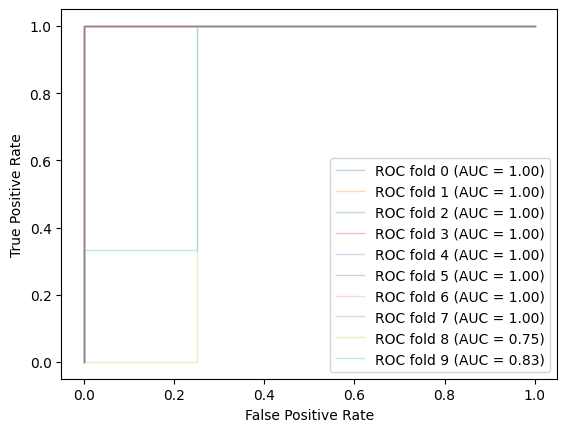

The estimated tpr for fold 0: 
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [44]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_curve, auc

cv = KFold(n_splits=10)

roc_sample = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

for train, test in cv.split(X, y):
    probas_ = model.fit(X[train], y[train]).predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_sample.append(np.interp(mean_fpr, fpr, tpr))
    roc_sample[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    i += 1

plt.legend()
plt.show()

print('The estimated tpr for fold 0: ')
print(roc_sample[0])

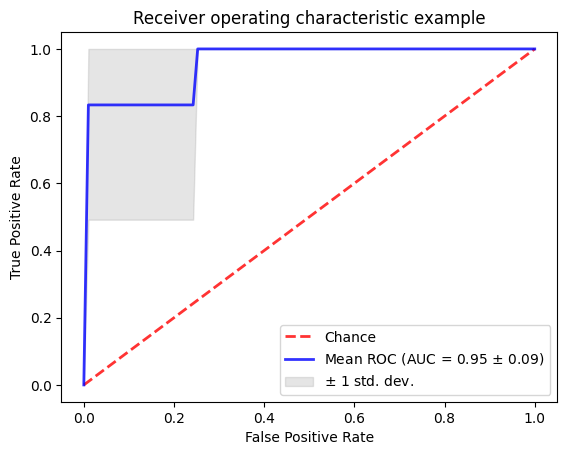

In [45]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(roc_sample, axis=0)
std_tpr = np.std(roc_sample, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) # Computing the AUC of the average curves
std_auc = np.std(aucs) # Computing the std of the AUCs 

plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Exercise 3.** Define the appropriate cross-validation strategy and measurement of the area under the curve for the data:

In [46]:
X, y = make_classification(n_samples = 200, n_features=5, n_redundant=0, n_informative=3, \
                           random_state=0, n_clusters_per_class=1, weights = [0.9])

In [47]:
px.scatter(x=X[:, 0], y=X[:, 1], color=pd.Categorical(y))

## Assigments 3.2

__Exercise 1.__ During lesson we discussed the problem of _selection bias_ in cross-validation. 
This problem is nicely investigated in the paper *On the Dangers of Cross-Validation. An Experimental Evaluation*, accessible here:

http://people.csail.mit.edu/romer/papers/CrossVal_SDM08.pdf


Read  
- Section 1 (Introduction), 
- Section 4 (Experiments on Synthetic Data), 
- Section 7 (Discussion)

And write a short summary (~half a page) about these three sections (results and take home message).



The goal of the general classification issue is to learn a classifier with strong generalization that
performs well on data from the same distribution that has never been seen before. Although classifier
performance may be tested, it is difficult to do so for big datasets. They addressed the drawbacks of
utilizing cross-validation error to choose between a large number of classification algorithms in this
study. When a large number of algorithms are run on a single data set, synthetic data is used to see
how good the cross-validation of the genuine error is. CV accuracy is influenced by the amount of
learning algorithms used.

When a large number of algorithms are run on a single data set, CV assesses how good the cross-
validation of the true error is. CV overestimate of accuracy is most obvious for small datasets with

high dimensionality when considering the impact of data size and dimensionality. As a result of
selecting a large number of features, the LOOCV error rises. Cross-Validation for Feature Selection
indicates that when a large set of features is picked via cross-validation, the feature selection is
likewise unstable. The "wrapper" approach ensures that the learning algorithm iterates over the
training data to find the feature that minimizes error.
The impact of selecting a large number of features is as follows: for a small dataset, cross-validation
accuracy improves even after selecting redundant features. It forces the classifier to use additional
features for large samples, but after a small number of features are selected, it makes little effect.
LOOCV stops being an effective measure of generalization when the number of cross-validation
techniques grows too high. This is due to the fact that executing a large number of algorithms overfits
them. As the sample size shrinks and the dimensionality rises, the behavior worsens. This is because
executing a large number of algorithms in cross-validation space effectively overfits.